# **Training MLP Network**

# **1-1 Dataset**

In [30]:
from IPython.display import clear_output
from keras.preprocessing.image import ImageDataGenerator
from sklearn import metrics
from itertools import cycle
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
!pip install unrar
# !unrar x './drive/MyDrive/NN_HW2_Face_Emotion.rar';

In [33]:
train_datagen = ImageDataGenerator(
        rescale = 1/255.0,
        rotation_range = 20,
        zoom_range = 0,
        width_shift_range = 0.1,
        height_shift_range = 0.1,
        shear_range = 0,
        horizontal_flip = True,
        fill_mode = "nearest",
        validation_split = 0.2)

tune_datagen = ImageDataGenerator(
        rescale = 1/255.0,
        rotation_range = 20,
        zoom_range = 0,
        width_shift_range = 0.1,
        height_shift_range = 0.1,
        shear_range = 0,
        horizontal_flip = True,
        fill_mode = "nearest",
        validation_split = 0.2)

train_DS = train_datagen.flow_from_directory(
    directory="TRAIN",
    target_size = (128, 128),
    color_mode="rgb",
    batch_size=400,
    class_mode="categorical",
    subset='training',
    shuffle=True,
    seed=42)

validation1_DS = train_datagen.flow_from_directory(
    directory="TRAIN",
    target_size = (128, 128),
    color_mode="rgb",
    batch_size=400,
    class_mode="categorical",
    subset='validation',
    shuffle=False,
    seed=42)

tune_DS = tune_datagen.flow_from_directory(
    directory="TUNE",
    target_size = (128, 128),
    color_mode="rgb",
    batch_size=400,
    class_mode="categorical",
    subset='training',
    shuffle=True,
    seed=42)

validation2_DS = tune_datagen.flow_from_directory(
    directory="TUNE",
    target_size = (128, 128),
    color_mode="rgb",
    batch_size=400,
    class_mode="categorical",
    subset='validation',
    shuffle=False,
    seed=42)

Found 6400 images belonging to 8 classes.
Found 1600 images belonging to 8 classes.
Found 1280 images belonging to 8 classes.
Found 320 images belonging to 8 classes.


# **2-1 VGGnet model**

In [34]:
VGGNet_baseModel = tf.keras.Sequential([

    # CONV 1 1
    tf.keras.layers.Conv2D(filters=16, input_shape=(128,128,3), kernel_size=(3,3), strides=(1,1), padding="same"),  #   activation="relu"
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    # CONV 1 2
    tf.keras.layers.Conv2D(filters=16, input_shape=(128,128,3), kernel_size=(3,3), strides=(1,1), padding="same"),  #   activation="relu"
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    # MAX POOL 1
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    # Dropout 1
    tf.keras.layers.GaussianDropout(0.2, input_shape=(64,64,3)),

    # CONV 2 1
    tf.keras.layers.Conv2D(filters=32, input_shape=(64,64,3), kernel_size=(3,3), strides=(1,1), padding="same"),  #   activation="relu"
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    # CONV 2 2
    tf.keras.layers.Conv2D(filters=32, input_shape=(64,64,3), kernel_size=(3,3), strides=(1,1), padding="same"),  #   activation="relu"
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    # MAX POOL 2
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    # Dropout 2
    tf.keras.layers.GaussianDropout(0.2, input_shape=(32,32,3)),

    # CONV 3 1
    tf.keras.layers.Conv2D(filters=64, input_shape=(32,32,3), kernel_size=(3,3), strides=(1,1), padding="same"),  #   activation="relu"
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    # CONV 3 2
    tf.keras.layers.Conv2D(filters=64, input_shape=(32,32,3), kernel_size=(3,3), strides=(1,1), padding="same"),  #   activation="relu"
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    # MAX POOL 3
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    # Dropout 3
    tf.keras.layers.GaussianDropout(0.2, input_shape=(16,16,3)),

    # CONV 4 1
    tf.keras.layers.Conv2D(filters=128, input_shape=(16,16,3), kernel_size=(3,3), strides=(1,1), padding="same"),  #   activation="relu"
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    # CONV 4 2
    tf.keras.layers.Conv2D(filters=128, input_shape=(16,16,3), kernel_size=(3,3), strides=(1,1), padding="same"),  #   activation="relu"
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    # MAX POOL 4
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    # Dropout 4
    tf.keras.layers.GaussianDropout(0.2, input_shape=(8,8,3)),

    # CONV 5 1
    tf.keras.layers.Conv2D(filters=128, input_shape=(8,8,3), kernel_size=(3,3), strides=(1,1), padding="same"),  #   activation="relu"
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    # CONV 5 2
    tf.keras.layers.Conv2D(filters=128, input_shape=(8,8,3), kernel_size=(3,3), strides=(1,1), padding="same"),  #   activation="relu"
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    # MAX POOL 5
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    # Dropout 5
    tf.keras.layers.GaussianDropout(0.2, input_shape=(4,4,3)),



    # Flatten
    tf.keras.layers.Flatten(),

    # Dense 1
    tf.keras.layers.Dense(1024),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    # Dropout 1
    tf.keras.layers.GaussianDropout(0.5),

    # Dense 2
    tf.keras.layers.Dense(1024),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    # Dropout 2
    tf.keras.layers.GaussianDropout(0.5),
])

In [35]:
# updatable plot

class PlotParams(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.acc = []

        self.fig = plt.figure()

        self.logs = []

    def on_epoch_end(self, epoch, logs={}):

        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.acc.append(logs.get('accuracy'))
        self.i += 1

        clear_output(wait=True)
        plt.subplot(2,1,1)
        plt.plot(self.x, self.losses, label="loss")
        plt.legend()
        plt.subplot(2,1,2)
        plt.plot(self.x, self.acc, label="accuracy")
        plt.legend()
        plt.show();

plot_params = PlotParams()

In [36]:
VGGNet_headModel = VGGNet_baseModel.output
# Output Layer
VGGNet_headModel = tf.keras.layers.Dense(8) (VGGNet_headModel)
VGGNet_headModel = tf.keras.layers.Softmax() (VGGNet_headModel)

VGGNet_Model = tf.keras.Model(inputs=VGGNet_baseModel.input, outputs=VGGNet_headModel)

VGGNet_Model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10_input (InputLaye  [(None, 128, 128, 3)]     0         
 r)                                                              
                                                                 
 conv2d_10 (Conv2D)          (None, 128, 128, 16)      448       
                                                                 
 batch_normalization_12 (Ba  (None, 128, 128, 16)      64        
 tchNormalization)                                               
                                                                 
 re_lu_12 (ReLU)             (None, 128, 128, 16)      0         
                                                                 
 conv2d_11 (Conv2D)          (None, 128, 128, 16)      2320      
                                                                 
 batch_normalization_13 (Ba  (None, 128, 128, 16)      64  

# **1-4 Training**

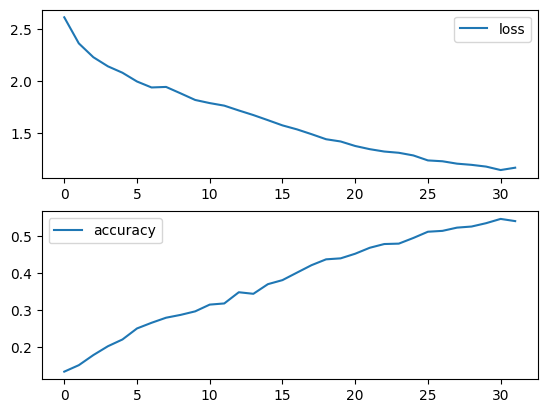

16/16 [==============================] - 35s 2s/step - loss: 1.1654 - accuracy: 0.5405


In [37]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8, weight_decay=1e-8)
VGGNet_Model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy'])
VGGNet_Model.fit(train_DS, epochs=32, callbacks=[plot_params])

In [38]:
validation1_DS.reset()
VGGNet_Model.evaluate(validation1_DS)

4/4 [==============================] - 7s 2s/step - loss: 1.7770 - accuracy: 0.4613


[1.7770166397094727, 0.4612500071525574]

# **1-5 Fine-Tuning**

In [39]:
tune_DS.reset()
i = 0
for layer in VGGNet_baseModel.layers:
	layer.trainable = False
	i += 1
	if i>=42:
		break

In [40]:
VGGNet_regModel = VGGNet_baseModel.output
# Output Layer
VGGNet_regModel = tf.keras.layers.Dense(8) (VGGNet_regModel)
VGGNet_regModel = tf.keras.layers.Softmax() (VGGNet_regModel)

VGGNet_tuneModel = tf.keras.Model(inputs=VGGNet_baseModel.input, outputs=VGGNet_regModel)

VGGNet_tuneModel.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10_input (InputLaye  [(None, 128, 128, 3)]     0         
 r)                                                              
                                                                 
 conv2d_10 (Conv2D)          (None, 128, 128, 16)      448       
                                                                 
 batch_normalization_12 (Ba  (None, 128, 128, 16)      64        
 tchNormalization)                                               
                                                                 
 re_lu_12 (ReLU)             (None, 128, 128, 16)      0         
                                                                 
 conv2d_11 (Conv2D)          (None, 128, 128, 16)      2320      
                                                                 
 batch_normalization_13 (Ba  (None, 128, 128, 16)      64  

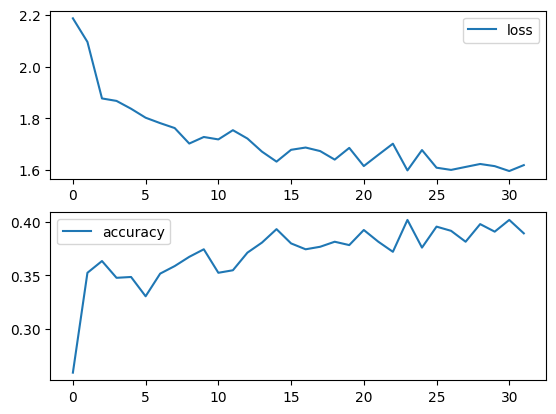

4/4 [==============================] - 6s 2s/step - loss: 1.6192 - accuracy: 0.3891


In [41]:
opt = tf.keras.optimizers.Adam(learning_rate=0.003, beta_1=0.9, beta_2=0.999, epsilon=1e-8, weight_decay=1e-8)
VGGNet_tuneModel.compile(loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy'])
VGGNet_tuneModel.fit(tune_DS, epochs=32, callbacks=[plot_params])

# **1-6 Evaluation**

In [59]:
validation2_DS.reset()
VGGNet_tuneModel.evaluate(validation2_DS)
y_pred = VGGNet_tuneModel.predict(validation2_DS)

1/1 [==============================] - 1s 1s/step


In [43]:
y_pred = tf.one_hot(tf.argmax(y_pred, axis=1), depth = 8)

In [44]:
y_tune = validation2_DS[0][1]

In [45]:
y_pred_enc = np.argmax(y_pred, axis=1)
y_tune_enc = np.argmax(y_tune, axis=1)

In [46]:
print('precision, recall,   f1-score')
print(metrics.precision_recall_fscore_support(y_tune_enc, y_pred_enc, average='micro', warn_for=('precision', 'recall', 'f-score'), zero_division='warn'))
print('------------------------------------------------------')
print(metrics.classification_report(y_tune_enc, y_pred_enc))

precision, recall,   f1-score
(0.425, 0.425, 0.425, None)
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.36      0.12      0.19        40
           1       0.53      0.62      0.57        40
           2       0.33      0.42      0.37        40
           3       0.43      0.57      0.49        40
           4       0.51      1.00      0.68        40
           5       0.36      0.33      0.34        40
           6       0.35      0.20      0.25        40
           7       0.31      0.12      0.18        40

    accuracy                           0.42       320
   macro avg       0.40      0.42      0.38       320
weighted avg       0.40      0.42      0.38       320



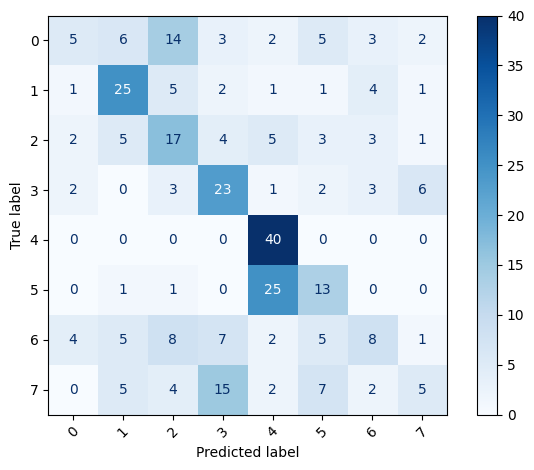

In [47]:
confusion_matrix = confusion_matrix(y_tune_enc, y_pred_enc)
target_names = ["0", "1", "2", "3", "4", "5", "6", "7"]
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)

plt.tight_layout()

class 0 f1 score
0.5550499304765516
class 0 precision score
0.6213818860877685
class 0 recall score
0.5464285714285715


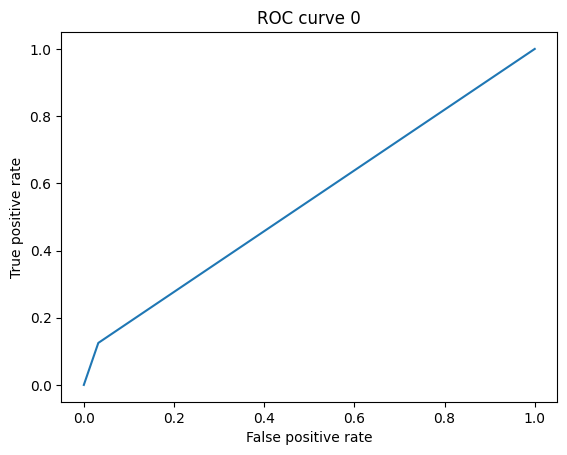

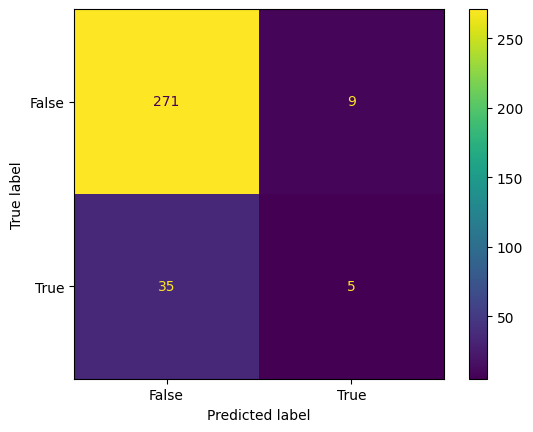

In [48]:
y_pred0 = tf.argmax(y_pred, axis=1) == 0
y_tune0 = tf.argmax(y_tune, axis=1) == 0
fpr0, tpr0, thresholds0 = metrics.roc_curve(y_tune0, y_pred0)
auc_rf0 = metrics.auc(fpr0, tpr0)
plt.plot(fpr0, tpr0, label='Keras (area = {:.3f})'.format(auc_rf0))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve 0')

print("class 0 f1 score")
print(metrics.f1_score(y_tune0, y_pred0, average="macro"))
print("class 0 precision score")
print(metrics.precision_score(y_tune0, y_pred0, average="macro"))
print("class 0 recall score")
print(metrics.recall_score(y_tune0, y_pred0, average="macro"))

confusion_matrix = metrics.confusion_matrix(y_tune0, y_pred0)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()

class 1 f1 score
0.7539024339548128
class 1 precision score
0.7384849193359831
class 1 recall score
0.7732142857142856


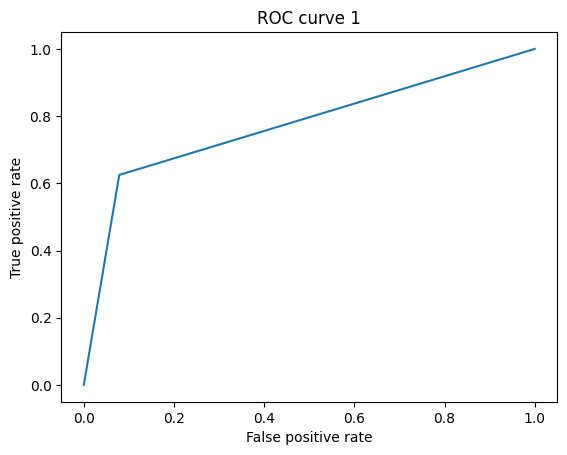

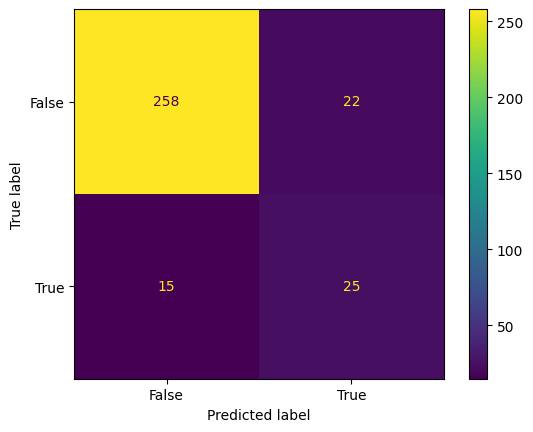

In [49]:
y_pred1 = tf.argmax(y_pred, axis=1) == 1
y_tune1 = tf.argmax(y_tune, axis=1) == 1
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_tune1, y_pred1)
auc_rf1 = metrics.auc(fpr1, tpr1)
plt.plot(fpr1, tpr1, label='Keras (area = {:.3f})'.format(auc_rf1))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve 1')

print("class 1 f1 score")
print(metrics.f1_score(y_tune1, y_pred1, average="macro"))
print("class 1 precision score")
print(metrics.precision_score(y_tune1, y_pred1, average="macro"))
print("class 1 recall score")
print(metrics.recall_score(y_tune1, y_pred1, average="macro"))

confusion_matrix = metrics.confusion_matrix(y_tune1, y_pred1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()

class 2 f1 score
0.6318629006664551
class 2 precision score
0.6205510907003444
class 2 recall score
0.65


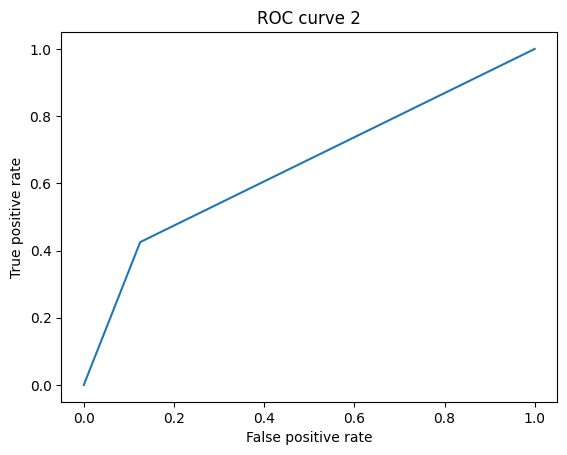

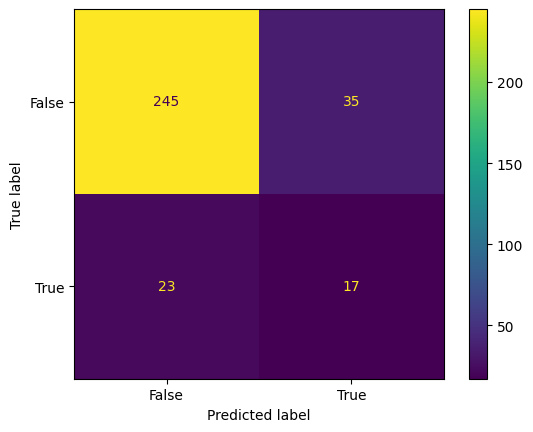

In [50]:
y_pred2 = tf.argmax(y_pred, axis=1) == 2
y_tune2 = tf.argmax(y_tune, axis=1) == 2
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_tune2, y_pred2)
auc_rf2 = metrics.auc(fpr2, tpr2)
plt.plot(fpr2, tpr2, label='Keras (area = {:.3f})'.format(auc_rf1))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve 2')

print("class 2 f1 score")
print(metrics.f1_score(y_tune2, y_pred2, average="macro"))
print("class 2 precision score")
print(metrics.precision_score(y_tune2, y_pred2, average="macro"))
print("class 2 recall score")
print(metrics.recall_score(y_tune2, y_pred2, average="macro"))

confusion_matrix = metrics.confusion_matrix(y_tune2, y_pred2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()

class 3 f1 score
0.7007248071077858
class 3 precision score
0.6810080757449178
class 3 recall score
0.7321428571428571


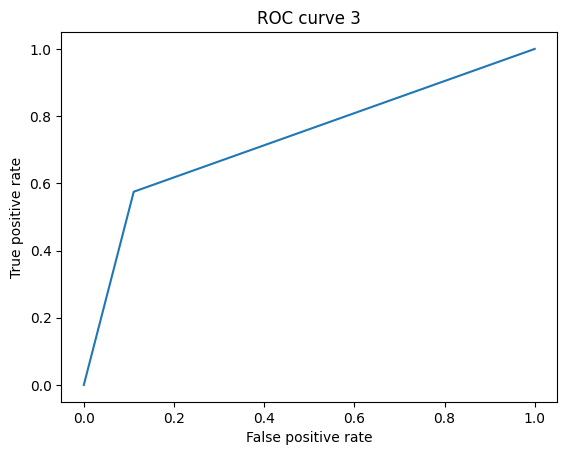

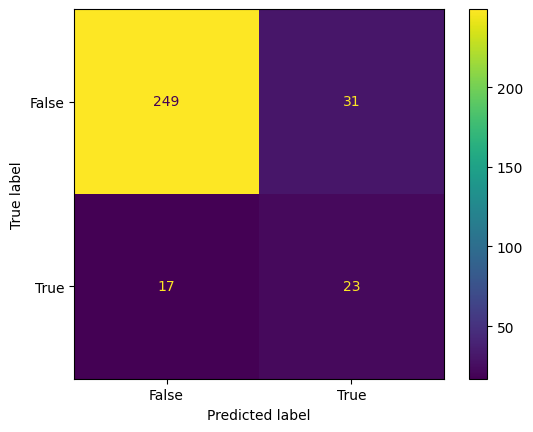

In [51]:
y_pred3 = tf.argmax(y_pred, axis=1) == 3
y_tune3 = tf.argmax(y_tune, axis=1) == 3
fpr3, tpr3, thresholds3 = metrics.roc_curve(y_tune3, y_pred3)
auc_rf3 = metrics.auc(fpr3, tpr3)
plt.plot(fpr3, tpr3, label='Keras (area = {:.3f})'.format(auc_rf1))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve 3')

print("class 3 f1 score")
print(metrics.f1_score(y_tune3, y_pred3, average="macro"))
print("class 3 precision score")
print(metrics.precision_score(y_tune3, y_pred3, average="macro"))
print("class 3 recall score")
print(metrics.recall_score(y_tune3, y_pred3, average="macro"))

confusion_matrix = metrics.confusion_matrix(y_tune3, y_pred3)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()

class 4 f1 score
0.8025845834145074
class 4 precision score
0.7564102564102564
class 4 recall score
0.9321428571428572


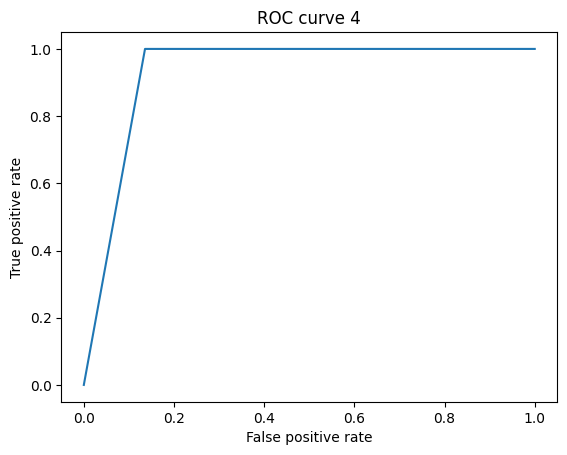

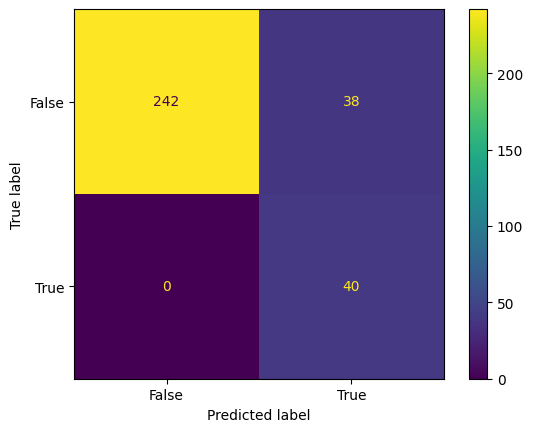

In [52]:
y_pred4 = tf.argmax(y_pred, axis=1) == 4
y_tune4 = tf.argmax(y_tune, axis=1) == 4
fpr4, tpr4, thresholds4 = metrics.roc_curve(y_tune4, y_pred4)
auc_rf4 = metrics.auc(fpr4, tpr4)
plt.plot(fpr4, tpr4, label='Keras (area = {:.3f})'.format(auc_rf1))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve 4')

print("class 4 f1 score")
print(metrics.f1_score(y_tune4, y_pred4, average="macro"))
print("class 4 precision score")
print(metrics.precision_score(y_tune4, y_pred4, average="macro"))
print("class 4 recall score")
print(metrics.recall_score(y_tune4, y_pred4, average="macro"))

confusion_matrix = metrics.confusion_matrix(y_tune4, y_pred4)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()

class 5 f1 score
0.6267263904441955
class 5 precision score
0.63302034428795
class 5 recall score
0.6214285714285714


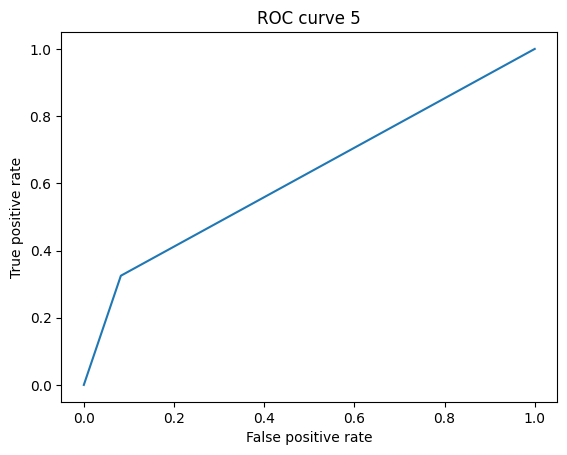

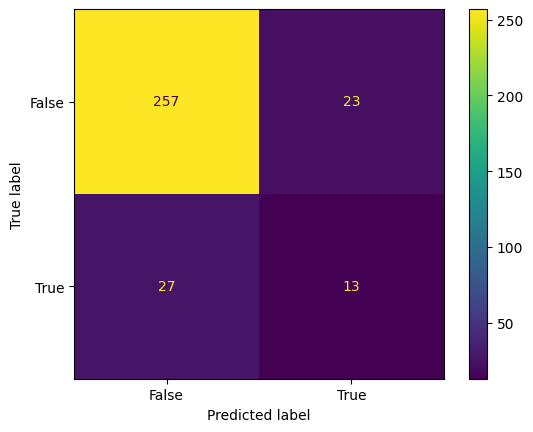

In [53]:
y_pred5 = tf.argmax(y_pred, axis=1) == 5
y_tune5 = tf.argmax(y_tune, axis=1) == 5
fpr5, tpr5, thresholds5 = metrics.roc_curve(y_tune5, y_pred5)
auc_rf5 = metrics.auc(fpr5, tpr5)
plt.plot(fpr5, tpr5, label='Keras (area = {:.3f})'.format(auc_rf1))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve 5')

print("class 5 f1 score")
print(metrics.f1_score(y_tune5, y_pred5, average="macro"))
print("class 5 precision score")
print(metrics.precision_score(y_tune5, y_pred5, average="macro"))
print("class 5 recall score")
print(metrics.recall_score(y_tune5, y_pred5, average="macro"))

confusion_matrix = metrics.confusion_matrix(y_tune5, y_pred5)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()

class 6 f1 score
0.5862562240378532
class 6 precision score
0.620040989606207
class 6 recall score
0.5732142857142857


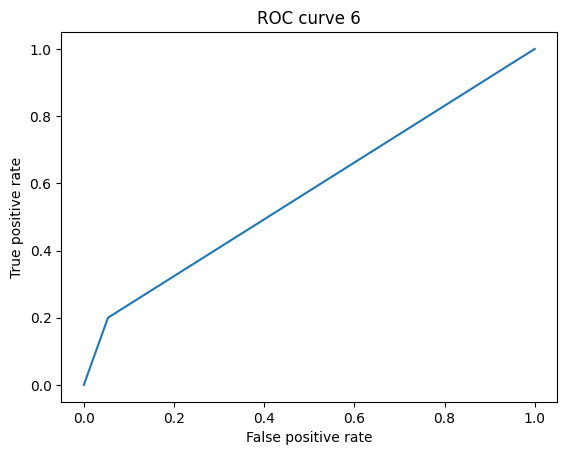

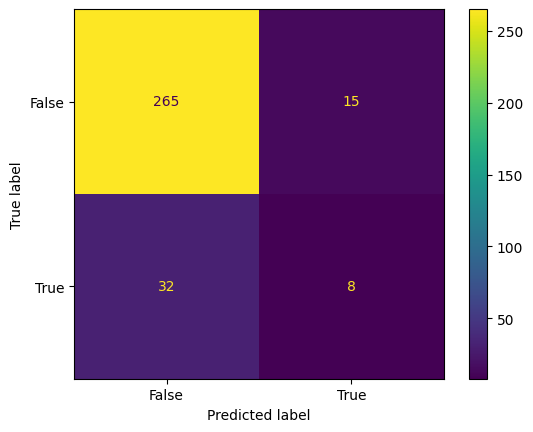

In [54]:
y_pred6 = tf.argmax(y_pred, axis=1) == 6
y_tune6 = tf.argmax(y_tune, axis=1) == 6
fpr6, tpr6, thresholds6 = metrics.roc_curve(y_tune6, y_pred6)
auc_rf6 = metrics.auc(fpr6, tpr6)
plt.plot(fpr6, tpr6, label='Keras (area = {:.3f})'.format(auc_rf1))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve 6')

print("class 6 f1 score")
print(metrics.f1_score(y_tune6, y_pred6, average="macro"))
print("class 6 precision score")
print(metrics.precision_score(y_tune6, y_pred6, average="macro"))
print("class 6 recall score")
print(metrics.recall_score(y_tune6, y_pred6, average="macro"))

confusion_matrix = metrics.confusion_matrix(y_tune6, y_pred6)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()

class 7 f1 score
0.5499021526418787
class 7 precision score
0.5986842105263157
class 7 recall score
0.5428571428571429


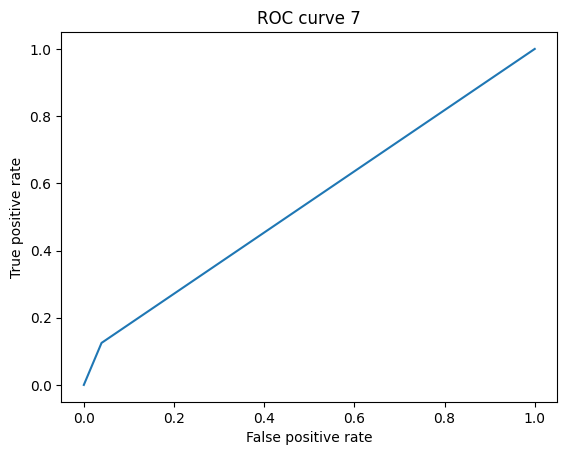

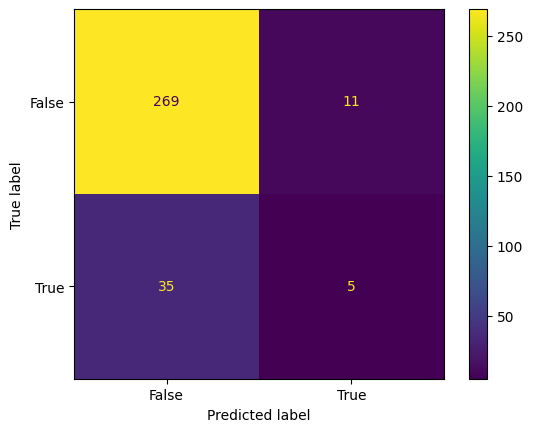

In [55]:
y_pred7 = tf.argmax(y_pred, axis=1) == 7
y_tune7 = tf.argmax(y_tune, axis=1) == 7
fpr7, tpr7, thresholds7 = metrics.roc_curve(y_tune7, y_pred7)
auc_rf7 = metrics.auc(fpr7, tpr7)
plt.plot(fpr7, tpr7, label='Keras (area = {:.3f})'.format(auc_rf1))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve 7')

print("class 7 f1 score")
print(metrics.f1_score(y_tune7, y_pred7, average="macro"))
print("class 7 precision score")
print(metrics.precision_score(y_tune7, y_pred7, average="macro"))
print("class 7 recall score")
print(metrics.recall_score(y_tune7, y_pred7, average="macro"))

confusion_matrix = metrics.confusion_matrix(y_tune7, y_pred7)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()

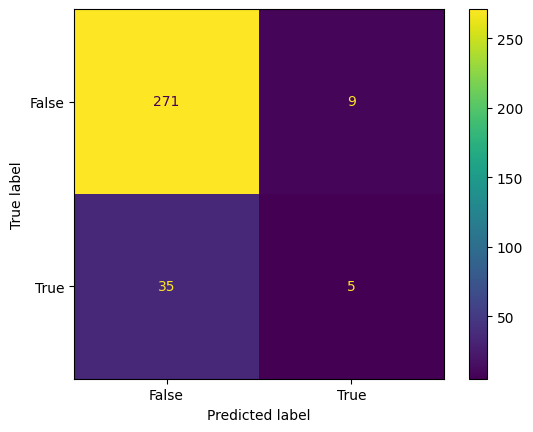

In [56]:
confusion_matrix = metrics.confusion_matrix(y_tune0, y_pred0)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()

In [57]:
n_classes = 8
fpr = [0] * 8
tpr = [0] * 8
thresholds = [0] * 8
auc_score = [0] * 8

for i in range(n_classes):
    fpr[i], tpr[i], thresholds[i] = metrics.roc_curve((y_tune_enc == i), (y_pred_enc == i))
    auc_score[i] = metrics.auc(fpr[i], tpr[i])

sum(auc_score) / n_classes

0.6714285714285715

Micro-averaged One-vs-Rest ROC AUC score:
0.67


Text(0.5, 1.0, 'ROC curve (AUC = 0.671)')

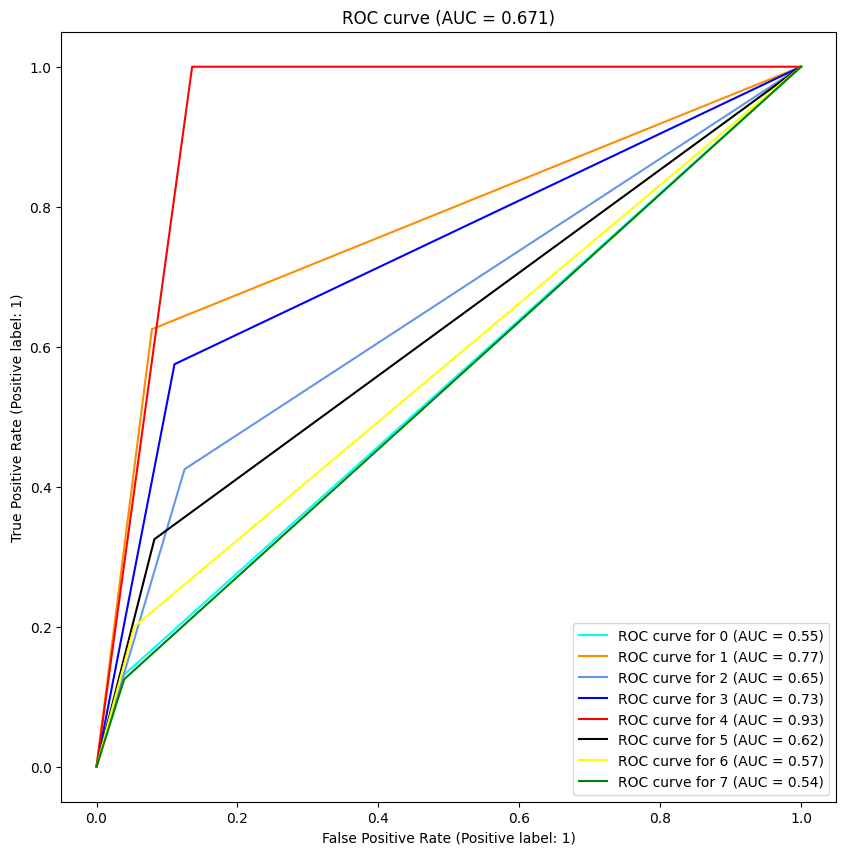

In [58]:
fig, ax = plt.subplots(figsize=(10, 10))
i = 0
colors = cycle(["aqua", "darkorange", "cornflowerblue", "blue", "red", "black", "yellow", "green"])
for class_id, color in zip(range(n_classes), colors):
    metrics.RocCurveDisplay.from_predictions(
        (y_tune_enc == i),
        (y_pred_enc == i),
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
    )
    i+=1


from sklearn.metrics import roc_auc_score

micro_roc_auc_ovr = roc_auc_score(
    y_tune,
    y_pred,
    multi_class="ovr",
    average="micro",
)

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{micro_roc_auc_ovr:.2f}")
plt.title('ROC curve (AUC = {:.3f})'.format(micro_roc_auc_ovr))